In [ ]:
#Theory of Singular Value Decomposition (SVD)
# A = U.S.Vt
#while Vt is a right-singular vectors
#      S is a diagonal vectors, containing sqrt(eigenvalue > 0), in a descending order
#      U is a left-singular vectors

#To do a SVD of matrix A(mxn):
#   1st: calculate a matrix P = At.A (if m>n, tall matrix, to create P(nxn) smaller)
#                    or     P = A.At (if m<n, wide matrix, to create P(mxm) smaller)
#   2nd: find the eigenvalues of P
#   3rd: create S matrix by arranging the sqrt(eigval) of P into a diagonal matrix, in a desceding order
#   4th: Calculate the inv(S) matrix by inverse the sqrt(eigval) -> 1/sqrt(eigval)
#   5th: Calculate the eigenvectors of P
#   6th: Normalize the eigenvectors by dividing them by their length (or module)
#   7th: Create Vt matrix by arranging the normalized eigenvectors in rows
#   8th: Calculate the U matrix = A.inv(S).V (V is transpose of Vt)
#   9th: We have decomposed matrix A = U.S.Vt

#The function numpy.linalg.svd(matrix) can do all the above jobs for us
# it returns a list containing 3 sub-matrix
# the first one [0] is U matrix
# the second one [1] is list containing sqrt(eigval), to make S matrix, use numpy.diag(...)
# and the third one [2] is the Vt matrix

--------------------------CAU 1-------------------------------
Dataframe of ex3.csv =
        post1  post2  post3  post4
word                             
ice        4      4      6      2
snow       6      1      0      5
tahoe      3      0      0      5
goal       0      6      5      1
puck       0      4      5      0

The U left-singular vectors matrix of df_ex3 =
 [[-0.62610079  0.01852561  0.6259093   0.23487748 -0.40090488]
 [-0.35134826 -0.67829097  0.0779915  -0.56006159  0.311005  ]
 [-0.21940528 -0.51980146 -0.50346468  0.6484906  -0.08747016]
 [-0.51965373  0.37026259 -0.59046979 -0.38005352 -0.31586445]
 [-0.40788911  0.36371724 -0.00485878  0.25726028  0.79695031]]

The S diagonal sqrt(eigenval) matrix of df_ex3 =
 [[13.3221948   0.          0.          0.        ]
 [ 0.          9.2609512   0.          0.        ]
 [ 0.          0.          2.41918664  0.        ]
 [ 0.          0.          0.          1.37892883]]

The Vt transpose normalized eigenvectors matrix of df

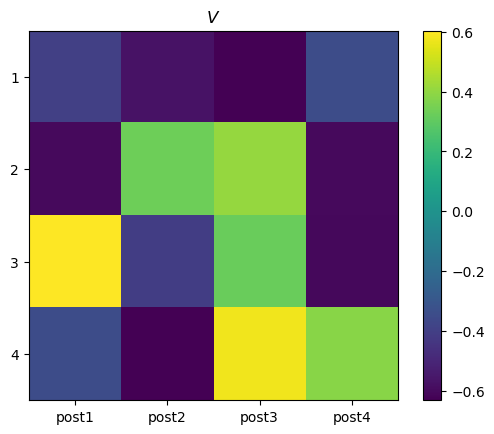

In [3]:
"""=============================================================================
Ex3: SVD
    Câu 1: 
        a) Cho tập tin ex3.csv. Đọc tập tin vào dataframe
        b) Phân tích SVD: U, s, VT từ dataframe
        c) Tạo dataframe mới từ U, s, VT, nhận xét và rút gọn thành phần, nếu có thể
        d) Tìm error nếu có rút gọn thành phần 
============================================================================="""
print('--------------------------CAU 1-------------------------------')
import numpy as np
import pandas as pd #Install pandas via linux: sudo apt install python3-pandas

#a) Read file ex3.csv into a dataframe
df_ex3 = pd.read_csv('data_Buoi4/ex3.csv', index_col=0)
print('Dataframe of ex3.csv =\n',df_ex3)

#b) Do SVD analysis for the df_ex3
U, S, Vt = np.linalg.svd(df_ex3)
print('\nThe U left-singular vectors matrix of df_ex3 =\n',U)
print('\nThe S diagonal sqrt(eigenval) matrix of df_ex3 =\n',np.diag(S))
print('\nThe Vt transpose normalized eigenvectors matrix of df_ex3 =\n',Vt)

#c) Recreate dataframe = U.dot(S).dot(Vt)
'''
in this example, the size of U is 5x5, while the size of S is 4x4
Therefore, cannot recreate an exact df_ex3 by multiplying U .dot( np.diag(S) ) .dot(Vt)

So we can only use a part of matrix U to recreate an approximate dataframe (or matrix)
In this case, I use only first 4 columns of Vt matrix, meaning Vt[:,:4] = 5x4
By this, we can multiply Vt(5x4) with diag(S)(4x4)
'''
col_headers=['post1','post2','post3','post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']

mtr_ex3_approx = np.matrix(U[:,:4].dot(np.diag(S)).dot(Vt)) #Create approximate matrix of ex3

df_ex3_approx = pd.DataFrame(mtr_ex3_approx, index=words, columns=col_headers) #Create approximate df of ex3

print('\nRecreate dataframe approximate dataframe df_ex3_approx = U[:,:4].dot(np.diag(S)).dot(Vt) =\n',df_ex3_approx)

#d) Calculate the errors between df_ex3 and df_ex3_approx
df_ex3_errors = df_ex3 - df_ex3_approx
print('\nErrors between original and approximate dataframe = df_ex3 - df_ex3_approx =\n',df_ex3_errors)

## e) Hiển thị
import matplotlib.pyplot as plt

plt.imshow(Vt, interpolation = 'none')
plt.xticks(range(len(col_headers)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(col_headers)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar()